# Data Scientist Associate Practical Exam

## Company Background
GoalZone is a fitness club chain providing five types of fitness classes in Canada. Finally, the fitness classes schedule is back to normal after the COVID-19 restrictions are lifted. However, they have received many complaints from the customers about having a hard time booking a fitness class.

From initial analysis, the program operation team found out that the fitness classes are always fully booked but are having a low attendance rate per class. To improve this situation, they would like to increase the class capacity for customers to sign up if a low attendance rate is predicted.  


## Customer Question
The operation manager has asked you to answer the following:
- Can you predict the attendance rate for each fitness class? 



## Dataset
The dataset contains the attendance information for the class scheduled this year so far. The data you will use for this analysis can be accessed here: `"data/fitness_class.csv"`

| Column Name                     | Criteria                                                                                                                                                                        |
|---------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Day of Week                     | Character, the day of the week the class was scheduled, one of values from “Mon” to “Sun”.                                                                                      |
| Time                            | Character, the time of the day the class was scheduled, either "AM" or "PM".                                                                                                        |
| Class Category                  | Character, the category of the fitness class, one of “Yoga”, “Aqua”, “Strength”, “HIIT”, or “Cycling”.                                                                          |
| Days Before                     | Numeric, number of days the class stayed fully booked, maximum five days.                                                                                                       |
| Class Capacity                  | Numeric, maximum number of members can sign up for that class, either 15 or 25.  The class capacity being 26 needs to be updated to 25.                                         |
| Attendance                      | Numeric, number of members actually attended the class.                                                                                                                         |
| Average Age                     | Numeric, average age of the members signing up for that class.  Remove rows that average age is smaller than 14 because group fitness class are for members aged 14 and order.  |
| Number of New Students          | Numeric, number of new students signing up for this class.                                                                                                                      |
| Number of Members Over 6 months | Numeric, number of members signing up for the class have been joining the club more than 6 months.                                                                              |                                                                                     |

# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


In [34]:
# Data Validation
# Check all variables in the data against the criteria in the dataset above
# Importing the needed libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Load the csv data
df= pd.read_csv("fitness_class.csv")
display(df.head())
df.shape 

,day_of_week,time,class_category,class_capacity,days_before,attendance,age,new_students,over_6_month
0,Wed,AM,Yoga,15,1,8,31.1,6,4
1,Sun,PM,Aqua,15,3,8,27.0,7,8
2,Mon,AM,Aqua,15,5,10,22.4,8,7
3,Sun,PM,Strength,25,3,18,23.5,7,9
4,Mon,AM,Yoga,15,5,10,29.8,5,7


(765, 9)

From the table above it looks like there are no missing values. The table above has **765 rows or observation**, One for each customer and **9 attributes**. Lets check the data types of the columns.

In [36]:
# The data types for each columns 
df.dtypes

day_of_week        object
time               object
class_category     object
class_capacity      int64
days_before         int64
attendance          int64
age               float64
new_students        int64
over_6_month        int64
dtype: object

In [37]:
df.describe()

,class_capacity,days_before,attendance,age,new_students,over_6_month
count,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000
mean,17.542484,2.547712,9.563399,29.092680,5.917647,7.577778
std,4.365481,1.355379,3.896598,5.912063,1.789224,1.974518
min,15.000000,1.000000,4.000000,8.300000,1.000000,2.000000
25%,15.000000,1.000000,7.000000,25.300000,5.000000,6.000000
50%,15.000000,2.000000,9.000000,29.000000,6.000000,8.000000
75%,25.000000,4.000000,11.000000,33.200000,7.000000,9.000000
max,26.000000,5.000000,21.000000,48.800000,11.000000,13.000000


## updating and removing of data
The maximum class capacity column needs to be updated from **26 to 25**, the age column has minimum age of 8.3 which is not acceptable,because group fitness class are meant for members age 14 and above, we are to **remove any age below 14years old**.

In [38]:
# updating the class_capacity column
df['class_capacity'].replace(26, 25, inplace = True)

In [39]:
#Age below 14
df[df.age < 14]

,day_of_week,time,class_category,class_capacity,days_before,attendance,age,new_students,over_6_month
55,Fri,AM,Strength,25,4,21,8.3,7,11
104,Sat,PM,Yoga,25,1,21,13.6,6,10
165,Thu,AM,Yoga,25,3,20,11.3,9,11


There are three customers below 14 which we are to be drop or remove from the data.

In [40]:
# Drop age below 14 years
df = df[df.age >= 14]
# Assert the result
assert df.age.min() >= 14
df.describe()

,class_capacity,days_before,attendance,age,new_students,over_6_month
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000
mean,17.506562,2.547244,9.519685,29.163648,5.912073,7.565617
std,4.336755,1.355768,3.841164,5.812547,1.788821,1.968617
min,15.000000,1.000000,4.000000,14.000000,1.000000,2.000000
25%,15.000000,1.000000,7.000000,25.300000,5.000000,6.000000
50%,15.000000,2.000000,9.000000,29.000000,6.000000,8.000000
75%,22.500000,4.000000,11.000000,33.200000,7.000000,9.000000
max,25.000000,5.000000,21.000000,48.800000,11.000000,13.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762 entries, 0 to 764
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   day_of_week     762 non-null    object 
 1   time            762 non-null    object 
 2   class_category  762 non-null    object 
 3   class_capacity  762 non-null    int64  
 4   days_before     762 non-null    int64  
 5   attendance      762 non-null    int64  
 6   age             762 non-null    float64
 7   new_students    762 non-null    int64  
 8   over_6_month    762 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 59.5+ KB


## checking for missing and duplicates values

In [42]:
#checking for missing values
df.isna().sum()

day_of_week       0
time              0
class_category    0
class_capacity    0
days_before       0
attendance        0
age               0
new_students      0
over_6_month      0
dtype: int64

In [43]:
df.duplicated().sum()

0

There are no missing and duplicates values in our data, which is very good 

In [44]:
df.iloc[:, 0:3].nunique()

day_of_week       7
time              2
class_category    5
dtype: int64

## Data Validation
Describe the validation tasks you completed and what you found. Have you made any changes to the data to enable further analysis? Remember to describe what you did for every column in the data. 

### The dataset contains **765 rows and 9 columns** with non missing values, class_capacity above 25 and average age below 14. I have validated all the columns against the criteria in the dataset table:
-  Day of Week: Same as description without missing values, "Mon" to "Sun".
-  Time: Same as description without missing values, either AM or PM.
-  Class Category: Same as description without missing values, 5 categories.
-  Days Before: Same as description without missing values, maximum of 5days.
-  Class Capacity: Update the maximum capacity from 26 to 25.
-  Attendance: Same as description without missing values.
-  Average Age: 3 values arebelow the average age of 14, so i decided to remove them.
-  Number of New Students: Same as description without missing values.
-  Number of Members over 6 Months: Same as description without missing values.
    
### After validation the dataset contains 762 rows and 9 columns.    

In [45]:
# Exploratory Analysis
# Explore the characteristics of the variables in the data
# Average attendance
df_mean= np.mean(df.attendance)
df_median = np.median(df.attendance)
print(df_mean, df_median)

9.51968503937008 9.0


**Visualizing the distribution of the target variable**

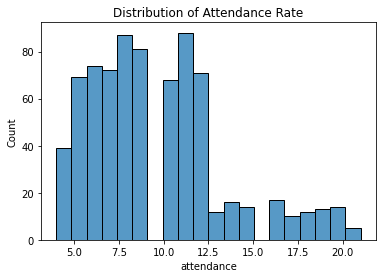

In [46]:
#visualizing the distribution
sns.histplot(data = df, x= 'attendance')
plt.title('Distribution of Attendance Rate')
plt.show()

In [47]:
print('The youngest age :{}' .format(df.age.min()))
print('The oldest age :{}' .format(df.age.max())) 

The youngest age :14.0
The oldest age :48.8


29.163648293963256

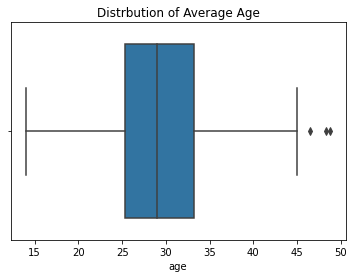

In [48]:
# average age
display(df.age.mean())
sns.boxplot(x= df.age)
plt.title('Distrbution of Average Age')
plt.show()

In [49]:
#class category values
df_cat= df.class_category.value_counts().sort_values()
df_cat

Cycling     130
HIIT        137
Aqua        160
Strength    162
Yoga        173
Name: class_category, dtype: int64

**Visualizing total Class Category.**

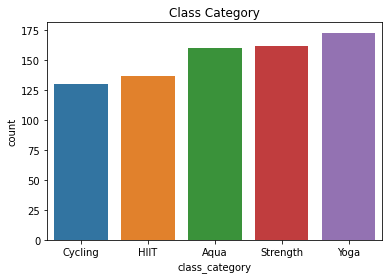

In [50]:
# visualizind the data 
category_order = ['Cycling', 'HIIT', 'Aqua', 'Strength', 'Yoga']
sns.countplot(x= 'class_category', data= df, order= category_order)
plt.title('Class Category')
plt.show()

**Relationship between **

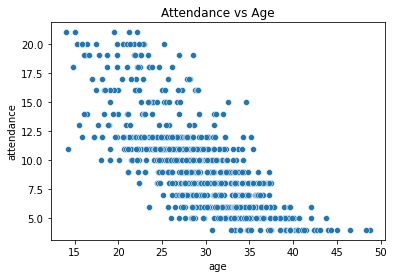

In [51]:
sns.scatterplot(data= df, x= 'age', y= 'attendance')
plt.title('Attendance vs Age')
plt.show()

The graph above shows that as the age increase attendance rate reduces, which means as people gets older the attendance rate reduces.

In [52]:
df_sub= df.groupby(['class_category', 'time']).attendance.count()
df_sub

class_category  time
Aqua            AM       84
                PM       76
Cycling         AM       62
                PM       68
HIIT            AM       73
                PM       64
Strength        AM       75
                PM       87
Yoga            AM       73
                PM      100
Name: attendance, dtype: int64

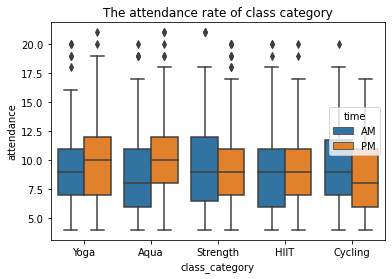

In [53]:
sns.boxplot(data=df, x= 'class_category', y= 'attendance', hue= 'time')
plt.title("The attendance rate of class category")
plt.show()

**Visulizing the correlation of the columns**.

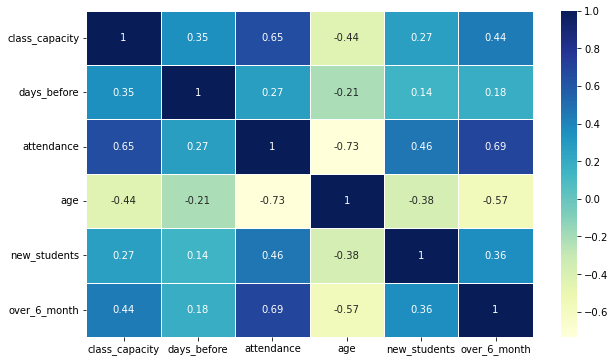

In [54]:
#lets calculate correlation
fig, ax= plt.subplots(figsize= (10,6))
sns.heatmap(df.corr(), annot= True, cmap= 'YlGnBu', linewidths= .9, ax=ax)
plt.show()

In [55]:
#viewing columns
df.columns

Index(['day_of_week', 'time', 'class_category', 'class_capacity',
       'days_before', 'attendance', 'age', 'new_students', 'over_6_month'],
      dtype='object')

In [56]:
#Rearranging our columns for better presentation
df= df[['day_of_week', 'time', 'class_category', 'class_capacity', 'days_before', 'age', 'new_students', 'over_6_month', 'attendance']]
df.head()

,day_of_week,time,class_category,class_capacity,days_before,age,new_students,over_6_month,attendance
0,Wed,AM,Yoga,15,1,31.1,6,4,8
1,Sun,PM,Aqua,15,3,27.0,7,8,8
2,Mon,AM,Aqua,15,5,22.4,8,7,10
3,Sun,PM,Strength,25,3,23.5,7,9,18
4,Mon,AM,Yoga,15,5,29.8,5,7,10


**Make changes to the data to enable modelling**

In [57]:
#covert category variable to numerical  
features = df.drop(columns= 'attendance')
X = pd.get_dummies(features, columns= ['day_of_week', 'time', 'class_category'],drop_first=True).values
y = df.attendance.values

## Exploratory Analysis
Describe what you found in the exploratory analysis. In your description you should:
- Reference at least two different data visualizations you created above to demonstrate the characteristics of single variables
- Reference at least one data visualization you created above to demonstrate the relationship between two or more variables
- Describe what your exploratory analysis has told you about the data
- Describe any changes you have made to the data to enable modeling

   After cleaning the data the next step is **Exploratory Data Analysis.** Our target variable is **attendance.**
- From the **distribution of attendance rate**, it shows that attendance rate is commom between 4.9 and 12.5, which means that there are more lower attendance rate than higher attendance rate.
- From the **distribution of average age**, it shows that the average age is 29 years old, most customers are between 14 - 45 years old, there are few customers older than 45 years old.
- Form the **class category barchart**, cycling has the lowest category and yoga has the highest category on average to the remaining category.
- Moreso, **relationship between attendace and age** is non-linear but it is predictable, it shows that as the age increase attendance rate reduces, which means as people gets older the attendance rate reduces.
- Also, from the last graph, **attendance and class category** are good prediction.
- Inaddition, i rearrange the order of the columms to make for a better presentation of our target variable.
  Finally, to enable model fitting for categorical variable, i have made the following changes:
-  convert all categorical features to numerical variable. 

In [58]:
# Model Fitting
# Choose and fit a baseline model
# Choose and fit a comparison model

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,KFold 
from sklearn.metrics import mean_squared_error as MSE
from sklearn.pipeline import Pipeline

In [59]:
#split the data into 70% train and 30% test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 100)

**Method 1:** **Linear Regression Model**

In [61]:
# baseline model
steps= [("scaler", StandardScaler()), ("lin_reg", LinearRegression())]
pipeline= Pipeline(steps)
kf = KFold(n_splits=5, random_state=42, shuffle=True)
cv= cross_val_score(pipeline, X, y, cv=kf)
print(cv)
print(np.mean(cv))

[0.74723378 0.73398035 0.69408206 0.7540324  0.76068375]
0.7380024683958277


**Evaluating Linear Regression Model**

In [64]:
# Model Evaluation
# Choose a metric and evaluate the performance of the two models
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
r_squared = pipeline.score(X_test, y_test)
print("LinearRegression r_squared: {}".format(r_squared))

LinearRegression r_squared: 0.7627174550062974


**Method 2: Lasso Regression Model.**

In [29]:
# scaling the features
steps= [("scaler", StandardScaler()), ("lasso", Lasso(alpha= 0.1))]
pipeline= Pipeline(steps)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lasso', Lasso(alpha=0.1))])

[ 0.27751048  0.         -0.24992011  0.25399689  0.54633207  0.
 -0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.        ]


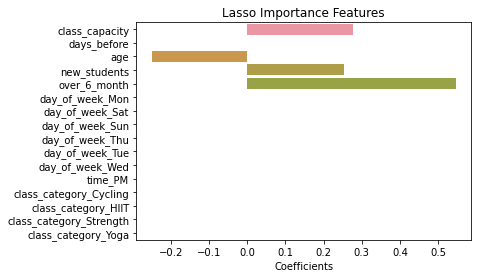

In [30]:
# print and plot the coefficients
names = pd.get_dummies(features, columns=['day_of_week', 'time', 
                                          'class_category'],drop_first=True).columns
lasso = Lasso(alpha= 0.1)
lasso_coef = lasso.fit(X_train, y_train).coef_
print(lasso_coef)
sns.barplot(y=names, x=lasso_coef)
plt.xlabel("Coefficients")
plt.title("Lasso Importance Features")
plt.show()

From the above plot the most **important feature** for our target variable is "number of member who have join over 6 months".

## Model Fitting
Describe your approach to the model fitting. In your description you should:
- Describe what type of machine learning problem you are working on
- Describe which method you selected for the baseline model and explain why you chose this model
- Describe which method you selected for the comparison model and explain why you chose this model

Predicting the attendance rate for each fitness class is a Supervised Machine Learning **Regression task**. I'm choosing a **Linear Regression** as a baseline because it is easy interpret and provide a linear relationship between the explanatory variable and the response variable. The comparision model I'm choosing is **Lasso Regresion** because it is used to select important feature of a dataset.

**Evaluating Lasso Regression Model**

In [31]:
y_pred = pipeline.predict(X_test)
r_squared = pipeline.score(X_test, y_test)
print("Lasso r_squared value: {}".format(r_squared))

Lasso r_squared value: 0.7591666004032471


## Model Evaluation
Explain what the results of your evaluation tell you. You should:
- Describe which metric you have selected to compare the models and why
- Explain what the outcome of this evaluation tells you about the performance of your models
- Identify, based on the evaluation, which you would consider to be the better performing approach

I'm choosing **R_Squared** to evaluate the model because it quantifies the amount of variance in the target values explained by the features.
 The r_squared value of LinearRegression and Lasso  is **0.76** and **0.75** respectively, which means that LinearRegression prediction is slightly better than lasso regression model when predicting the attendance rate of for each fitness class.
  From this model above, we can conclude that the Linear Regression model has a higher chance of predicting the correct attendance rate.

## ✅ When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review grading rubric. Have you included everything that will be graded?
- Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam